In [68]:
import pandas as pd
df=pd.read_csv("/content/Datasets/BankChurners.csv")

In [69]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [71]:
df['Attrition_Flag'].value_counts()

,count
Attrition_Flag,
Existing Customer,8500
Attrited Customer,1627


In [72]:
df.drop(columns=['CLIENTNUM',
                 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
                 'Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio','Total_Amt_Chng_Q4_Q1','Avg_Open_To_Buy','Contacts_Count_12_mon'],inplace=True)

In [73]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,12691.0,777,1144,42
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,8256.0,864,1291,33
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,3418.0,0,1887,20
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,3313.0,2517,1171,20
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,4716.0,0,816,28


In [74]:
from sklearn.preprocessing import LabelEncoder
le={
    'Attrition_Flag':LabelEncoder(),
    'Gender':LabelEncoder(),
    'Education_Level':LabelEncoder(),
    'Marital_Status':LabelEncoder(),
    'Income_Category':LabelEncoder(),
    'Card_Category':LabelEncoder()
}

In [75]:
df['Attrition_Flag']=le['Attrition_Flag'].fit_transform(df['Attrition_Flag'])
df['Gender']=le['Gender'].fit_transform(df['Gender'])
df['Education_Level']=le['Education_Level'].fit_transform(df['Education_Level'])
df['Marital_Status']=le['Marital_Status'].fit_transform(df['Marital_Status'])
df['Income_Category']=le['Income_Category'].fit_transform(df['Income_Category'])
df['Card_Category']=le['Card_Category'].fit_transform(df['Card_Category'])

In [76]:
import pickle
with open('label_encoders.pkl','wb') as file:
  pickle.dump(le,file)

In [62]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
0,1,45,1,3,3,1,2,0,39,5,1,12691.0,777,1144,42
1,1,49,0,5,2,2,4,0,44,6,1,8256.0,864,1291,33
2,1,51,1,3,2,1,3,0,36,4,1,3418.0,0,1887,20
3,1,40,0,4,3,3,4,0,34,3,4,3313.0,2517,1171,20
4,1,40,1,3,5,1,2,0,21,5,1,4716.0,0,816,28


In [77]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['Attrition_Flag'])
y=df['Attrition_Flag']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
X_train.shape

(8101, 14)

In [78]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [79]:
X_train

array([[ 0.95906107, -0.94509224, -1.03512207, ...,  0.69607512,
         1.2203476 ,  1.4473496 ],
       [ 1.45768789, -0.94509224,  1.29138969, ...,  0.78804843,
        -0.67499292, -1.09988843],
       [-0.16284927, -0.94509224,  1.29138969, ...,  0.59797025,
        -0.87225886, -1.22725033],
       ...,
       [-0.53681938, -0.94509224,  1.29138969, ...,  0.47411286,
         0.08085018,  0.38600042],
       [-0.78613279,  1.05809778,  0.51588577, ...,  0.67032259,
        -0.85873541, -0.97252653],
       [ 0.83440437,  1.05809778,  1.29138969, ..., -1.42298996,
         0.02028865,  1.15017183]])

In [80]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [81]:
model=Sequential()
model.add(Dense(10,activation='relu',input_dim=14))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 10)                  │             150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 7)                   │              77 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235 (940.00 B)

 Trainable params: 235 (940.00 B)

 Non-trainable params: 0 (0.00 B)

In [83]:
model.compile(optimizer='Adam',loss='binary_crossentropy')

In [84]:
history=model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7190 - val_loss: 0.4641
Epoch 2/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4263 - val_loss: 0.3406
Epoch 3/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3252 - val_loss: 0.2954
Epoch 4/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2867 - val_loss: 0.2744
Epoch 5/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2742 - val_loss: 0.2599
Epoch 6/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2525 - val_loss: 0.2475
Epoch 7/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2505 - val_loss: 0.2373
Epoch 8/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2365 - val_loss: 0.2289
Epoch 9/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2302 - val_loss: 0.2230
Epoch 10/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2334 - val_loss: 0.2179
Epoch 11/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2180 - val_loss: 0.2146
Epoch 12/100
203/203 ━━━━━━━━━━━━━━━━━━━━

In [38]:
model.layers[1].get_weights()

[array([[ 6.29832  ],
        [ 3.4028904],
        [-3.5667133]], dtype=float32),
 array([-0.54442644], dtype=float32)]

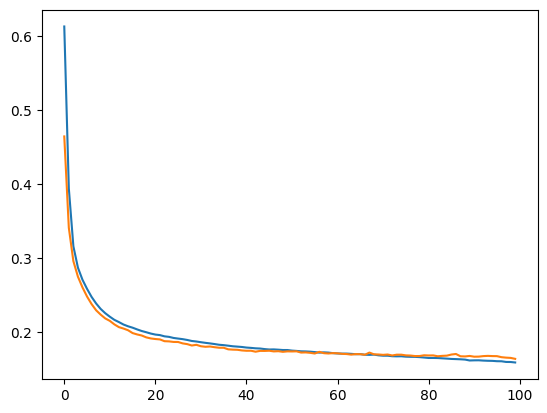

In [85]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [86]:
y_pred=model.predict(X_test)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [88]:
import numpy as np
y_pred=np.where(y_pred>0.5,1,0)

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9244817374136229

In [92]:
model.save("saved_model.keras")